In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [15]:
train_data_path = './data/train.csv'
test_data_path = './data/test.csv'
submission_path = './data/sample_submission.csv'

train_data = pd.read_csv(train_data_path)
test_data = pd.read_csv(test_data_path)
submission = pd.read_csv(submission_path)

In [19]:
#pd.concat合并两个dataframe,当着两个dataframe列相同时(名称、顺序、数量均相同),不会发出警告,
#如果不同，则需要传入sort参数，为True会按照列名的首字母排序，为False则不会排序
data_all = pd.concat([train_data, test_data], axis=0, sort=False)

In [ ]:
#直方图和柱状图的区别
'''
个人认为直方图针对区间数据，查看在某个区间内的数据分布，柱状图查看的是某个值的数量
如果数值比较多，跨度较大，就使用直方图（比如年级），数值较少使用柱状图
'''

# Survived of Sex

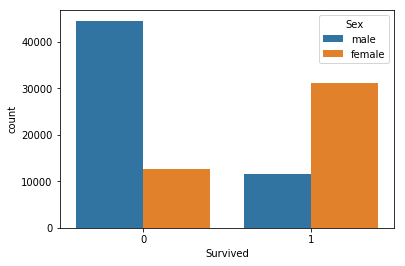

In [29]:
#在lightgbm中使用pyplot进行了数据的可视化,这里使用seaborn进行数据的可视化
#countplot计数图,可以比较类别之间的数量
#x是横坐标,为dataframe中的列名，data是一个dataframe,hue也是dataframe的列名，根据该类分类查看每一类的值
sns.countplot(x='Survived', data=train_data, hue='Sex')

# Survived of Pclass

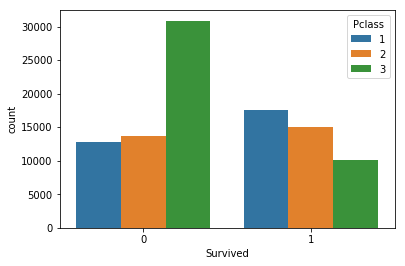

In [31]:
sns.countplot(x='Survived', data=train_data, hue='Pclass')

# Survived of SibSp

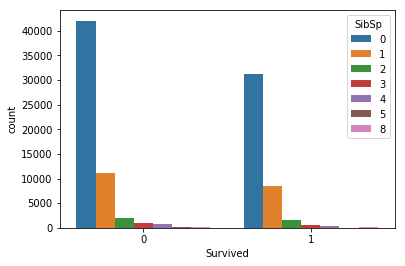

In [35]:
sns.countplot(x='Survived', data=train_data, hue='SibSp')

# Survived of Parch 

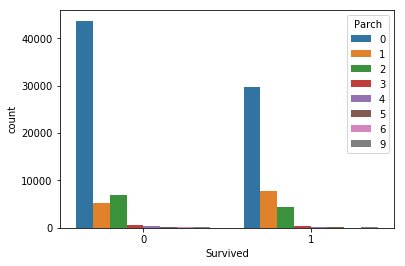

In [37]:
sns.countplot(x='Survived', data=train_data, hue='Parch')

# Survived of Embarked

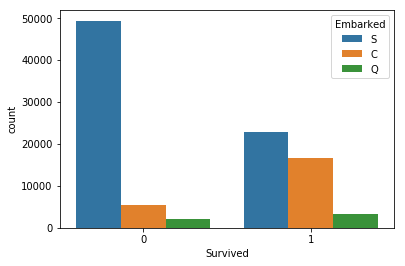

In [38]:
sns.countplot(x='Survived', data=train_data, hue='Embarked')

# Survival

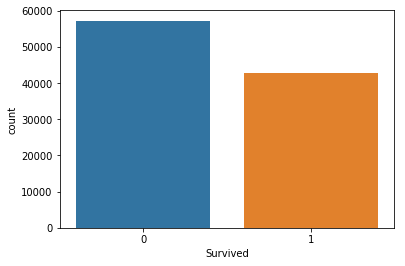

In [40]:
#sns和plot挺像的，不过更加简便，不使用hue参数查看的就是x列的情况
sns.countplot(x='Survived', data=train_data)

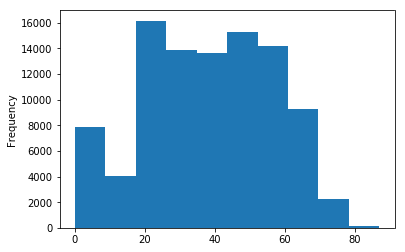

In [43]:
train_data['Age'].plot(kind='hist')

# Correlation coefficient matrix

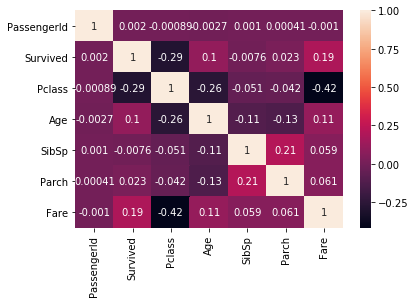

In [46]:
train_corr_matrix = train_data.corr()
#如果特征之间的相关性较大，可以在特征工程的时候考虑合并等操作
#annot参数为True时会在图像上显示相关系数
sns.heatmap(train_corr_matrix, annot=True)

In [30]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
PassengerId    100000 non-null int64
Survived       100000 non-null int64
Pclass         100000 non-null int64
Name           100000 non-null object
Sex            100000 non-null object
Age            96708 non-null float64
SibSp          100000 non-null int64
Parch          100000 non-null int64
Ticket         95377 non-null object
Fare           99866 non-null float64
Cabin          32134 non-null object
Embarked       99750 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


In [18]:
data_all.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
99995,27.0,NaN,Q,10.12,"Cash, Cheryle",0,199995,3,female,0,NaN,7686
99996,59.0,NaN,S,68.31,"Brown, Howard",0,199996,1,male,1,NaN,13004
99997,47.0,NaN,S,10.87,"Lightfoot, Cameron",0,199997,3,male,0,NaN,4383317
99998,49.0,B20828,C,29.68,"Jacobsen, Margaret",2,199998,1,female,1,NaN,PC 26988
99999,41.0,E13345,C,195.41,"Fishback, Joanna",2,199999,1,female,0,NaN,PC 41824


In [20]:
data_all.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
99995,199995,NaN,3,"Cash, Cheryle",female,27.0,0,0,7686,10.12,NaN,Q
99996,199996,NaN,1,"Brown, Howard",male,59.0,1,0,13004,68.31,NaN,S
99997,199997,NaN,3,"Lightfoot, Cameron",male,47.0,0,0,4383317,10.87,NaN,S
99998,199998,NaN,1,"Jacobsen, Margaret",female,49.0,1,2,PC 26988,29.68,B20828,C
99999,199999,NaN,1,"Fishback, Joanna",female,41.0,0,2,PC 41824,195.41,E13345,C
